#Breast Cancer Prediction
## CHIANALE Matteo
Now you have a new dataset describing the Breast cancer (Source Kaggle). Features are computed from a digitized
image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in
the image. The 3-dimensional space is that described in: ”K. P. Bennett and O. L. Mangasarian: ”Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets”, Optimization Methods and Software 1, 1992,
23-34”.
This database is also available through the UW CS ftp server: ¿ ftp ftp.cs.wisc.edu ¿ cd math-prog/cpodataset/machine-learn/WDBC/
Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/
datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
The Attribute Information are:
1. ID number
2. Diagnosis (M = malignant, B = benign)
Ten real-valued features are computed for each cell nucleus:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter2
area−1.0
)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (”coastline approximation” - 1)
The mean, standard error and ”worst” or largest (mean of the three largest values) of these features were
computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE,
field 23 is Worst Radius.
All feature values are recorded with four significant digits.
Missing attribute values: none. But you have to check. Class distribution: 357 benign, 212 malignant
To do: Make a comparative study between Logistic regression and Naive Bayes

## 1. LOAD THE DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data_BreastCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## 2. CLEAN THE DATA

### A. Drop unnecessary columns

In [ ]:
df = df.iloc[:, :32]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### B. Missing values

In [ ]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 3. X and Y DATA
We want to predict diagnosis.

In [ ]:
X = df.drop(columns='diagnosis')
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#assign 1 to M and 0 to B
Y = df['diagnosis'].map({'M' : 1,
           'B' : 0})
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
X.shape, Y.shape

((569, 31), (569,))

## 4. SPLIT AND SCALE THE DATA

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=42, stratify=Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_STD = StandardScaler()
scaler_Norm=MinMaxScaler()

In [ ]:
#for the first tries, we will use standard scaler
x_train_STD = scaler_STD.fit_transform(x_train)
x_test_STD = scaler_STD.fit_transform(x_test)
print("train :\n", x_train_STD, "\n test :\n", x_test_STD)

train :
 [[-0.24322109  0.51855873  0.89182579 ... -0.23574392  0.05456632
   0.02183673]
 [ 0.40837337 -0.51636409 -1.63971029 ... -0.32320788 -0.13757624
  -0.90440164]
 [-0.2427714  -0.36811839  0.45551496 ... -0.89082504 -0.675893
  -0.14401559]
 ...
 [-0.18079822 -0.32616206  1.33280304 ... -0.84289958 -0.96490082
  -1.16888375]
 [-0.24272259  0.00948859  0.25952507 ...  0.27571059 -0.60284707
  -0.30545988]
 [ 0.42803134  0.80945595  0.36918608 ...  1.00657384 -0.46151907
  -0.44817001]] 
 test :
 [[-0.21371834 -0.77858122 -1.84895959 ... -0.35252213  0.29417316
   0.11324302]
 [-0.21349303  2.11699124  1.11082675 ...  1.63049199  0.48833767
  -0.26951071]
 [-0.21330702  0.66768582 -0.62926742 ...  0.22998417  0.53599623
   0.36140827]
 ...
 [-0.21319503  0.16939214  0.13042656 ... -0.24822202 -0.66782371
  -0.48871388]
 [-0.21355473  0.34865633 -0.4875508  ...  0.23162411  0.99846078
   0.80435769]
 [-0.12562943  0.63730206  0.20244648 ...  0.67112773 -0.3518651
  -1.09975693]]


## 4. First Model Fitting and Predicting

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### A. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
#LR_model fitting
LR_model.fit(x_train_STD, y_train)
#LR_model predicting
LR_predict = LR_model.predict(x_test_STD)

In [ ]:
LR_accuracy = accuracy_score(y_test, LR_predict)*100
LR_mse = mean_squared_error(y_test, LR_predict)
LR_r2 = r2_score(y_test, LR_predict)
print('Logistic Regression gets an accuracy of {:.3f}%'.format(LR_accuracy))
print('mean squared error : {:.3f}'.format(LR_mse))
print('r2 score : {:.3f}'.format(LR_r2))

Logistic Regression gets an accuracy of 98.246%
mean squared error : 0.018
r2 score : 0.925


### B. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
#NB_model fitting
NB_model.fit(x_train_STD, y_train)
#NB_model predicting
NB_predict = NB_model.predict(x_test_STD)

In [ ]:
NB_accuracy = accuracy_score(y_test, NB_predict)*100
NB_mse = mean_squared_error(y_test, NB_predict)
NB_r2 = r2_score(y_test, NB_predict)
print('Naive Bayes gets an accuracy of {:.3f}%'.format(NB_accuracy))
print('mean squared error : {:.3f}'.format(NB_mse))
print('r2 score : {:.3f}'.format(NB_r2))

Naive Bayes gets an accuracy of 92.105%
mean squared error : 0.079
r2 score : 0.661


## 5. COMPARE MODELS
Logistic Regression looks to fit the data better than Naive Bayes, but we can still compare the two different models with different case : test_size, scaler method.

### A. Custom Pipeline with a scaler and a model

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
def customPipeline(model, scaler):
  return Pipeline(steps=[
          ('scale', scaler),
          ('model', model)
      ])

### B. Evaluate a custom pipeline with a specific test_size

In [ ]:
def modelEvaluation(X, Y, model, test_size, scaler):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size,  random_state=42)
  #create my custom pipeline
  pipe = customPipeline(model, scaler)
  #fit data
  pipe.fit(x_train, y_train)
  #predict
  y_pred = pipe.predict(x_test)
  #get some information
  acc = round(accuracy_score(y_test, y_pred)*100,3)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  return pipe, y_pred, acc, mse, r2

### C. Compare differents pipeline and test_sizes

In [ ]:
def compareModel(models, test_sizes, scalers):
    models_array = []
    scalers_array = []
    test_sizes_array = []
    acc_array = []
    mse_array = []
    r2_score_array = []
    for m in models:
      for s in scalers:
        for tz in test_sizes:
          _, _,acc, mse, r2 = modelEvaluation(X,Y,m,tz,s)
          models_array.append(str(m).split('()')[0])
          scalers_array.append(str(s).split('()')[0])
          test_sizes_array.append(tz)
          acc_array.append(acc)
          mse_array.append(mse)
          r2_score_array.append(r2)
    return pd.DataFrame({
        'model' : models_array,
        'scaler' : scalers_array,
        'test_size' : test_sizes_array,
        'accuracy in (%)' : acc_array,
        'mse' : mse_array,
        'r2_score' : r2_score_array})

### D. Run comparaison for logistic regression and naive bayes

In [ ]:
models = [LogisticRegression(), GaussianNB()]
scalers = [StandardScaler() , MinMaxScaler()]
test_sizes = [0.1 , 0.2, 0.3]
df_comparaison = compareModel(models, test_sizes, scalers)
display(df_comparaison)

,model,scaler,test_size,accuracy in (%),mse,r2_score
0,LogisticRegression,StandardScaler,0.1,98.246,0.017544,0.916176
1,LogisticRegression,StandardScaler,0.2,97.368,0.026316,0.887979
2,LogisticRegression,StandardScaler,0.3,98.246,0.017544,0.924603
3,LogisticRegression,MinMaxScaler,0.1,98.246,0.017544,0.916176
4,LogisticRegression,MinMaxScaler,0.2,98.246,0.017544,0.925319
5,LogisticRegression,MinMaxScaler,0.3,96.491,0.035088,0.849206
6,GaussianNB,StandardScaler,0.1,96.491,0.035088,0.832353
7,GaussianNB,StandardScaler,0.2,96.491,0.035088,0.850639
8,GaussianNB,StandardScaler,0.3,93.567,0.064327,0.723545
9,GaussianNB,MinMaxScaler,0.1,96.491,0.035088,0.832353


In conclusion, Logistic Regression in more efficient than Naive Bayes. Logistic Regression is a good choice for our goal:
- because we want to do binary classification (M = malignant, B = benign) and it can handle large datasets.
- Moreover, in the following part, we can try to add L2 regularization terms to reduce the impact of irrelevant features (We have a lot of features).
- Perhaps Gaussian naive bayes fited well to.

In [ ]:
#get the pipeline, test size of the most accurate model
display(df_comparaison[df_comparaison['accuracy in (%)'] == df_comparaison['accuracy in (%)'].max()])

,model,scaler,test_size,accuracy in (%),mse,r2_score
0,LogisticRegression,StandardScaler,0.1,98.246,0.017544,0.916176
2,LogisticRegression,StandardScaler,0.3,98.246,0.017544,0.924603
3,LogisticRegression,MinMaxScaler,0.1,98.246,0.017544,0.916176
4,LogisticRegression,MinMaxScaler,0.2,98.246,0.017544,0.925319


In [ ]:
#get the pipeline, test size with the min mse
display(df_comparaison[df_comparaison['mse'] == df_comparaison['mse'].min()])

,model,scaler,test_size,accuracy in (%),mse,r2_score
0,LogisticRegression,StandardScaler,0.1,98.246,0.017544,0.916176
2,LogisticRegression,StandardScaler,0.3,98.246,0.017544,0.924603
3,LogisticRegression,MinMaxScaler,0.1,98.246,0.017544,0.916176
4,LogisticRegression,MinMaxScaler,0.2,98.246,0.017544,0.925319


In [ ]:
#get the pipeline, test size with the max r2_score
display(df_comparaison[df_comparaison['r2_score'] == df_comparaison['r2_score'].max()])

,model,scaler,test_size,accuracy in (%),mse,r2_score
4,LogisticRegression,MinMaxScaler,0.2,98.246,0.017544,0.925319


## 6. OPTIMIZATION WITH GRID_SEARCH
Just a test, it is not usefull because I can 't get a bigger accuracy than previous.

In [ ]:
#disable warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,  random_state=42, stratify=Y)

#create pipe
pipe = Pipeline(steps=[('scale', MinMaxScaler()),
                        ('pca', PCA()),
                        ('model', LogisticRegression())])

parameters = dict(  pca__n_components=  list(range(1,x_train.shape[1]+1,1)),
                    model__solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
                    model__C=  np.logspace(-4, 4, 50),# [0.001, 0.01, 0.1, 1, 10, 100, 1000]
                    model__penalty= ['None', 'l2', 'elasticnet']) #don t support l1, I don't know why

grid_cv = GridSearchCV(pipe, parameters, scoring = make_scorer(accuracy_score), cv=5, n_jobs=-1, verbose=2)
grid_cv = grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 27900 candidates, totalling 139500 fits


In [ ]:
print("Our optimized Logistic Regression model is:")
grid_cv.best_estimator_

Our optimized Logistic Regression model is:


Pipeline(steps=[('scale', MinMaxScaler()), ('pca', PCA(n_components=11)),
                ('model', LogisticRegression(C=7.9060432109076855))])

In [ ]:
optimal_model = grid_cv.best_estimator_
optimal_model.fit(x_train, y_train)
optimal_predict = optimal_model.predict(x_test)
final_accuracy = accuracy_score(y_test, optimal_predict)
print('final accuracy : {:.3f}%'.format(100*final_accuracy))

final accuracy : 98.246%


## 7. RESULTS ANALYSIS

### 1. Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

In [ ]:
rep = classification_report(y_test, optimal_predict)
print(rep)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
conf_mat = confusion_matrix(y_test, optimal_predict)
print('true negative : {}   false positive : {}\nfalse negative {}:   true positive : {}'.format(conf_mat[0,0], conf_mat[0,1] , conf_mat[1,0], conf_mat[1,1]))

true negative : 72   false positive : 0
false negative 2:   true positive : 40


### B. Plot the ROC curve

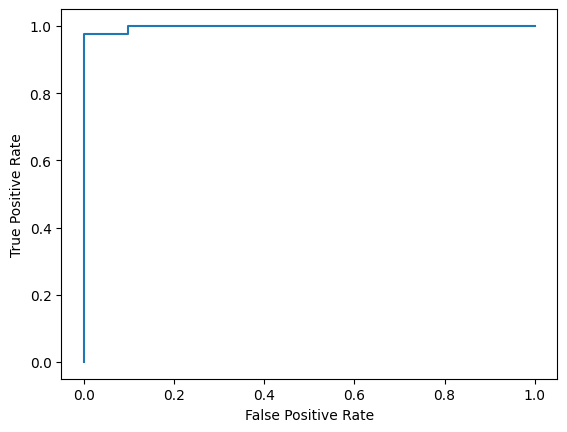

In [ ]:
y_pred_proba = optimal_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- We can see a point in the upper left corner of the curve which represents a high True-Positive-Rate and a low False-Positive-Rate, it is indicating good model performance.
- Moreover the curve is always greater than the baseline (diagonal line).
- Also the area under the curve (AUC) looks to be very close of 1 which is highlight the good performance of the model.

In [ ]:
auc = metrics.auc(fpr, tpr)
auc

0.9976851851851852

The auc is greater than 0.9. The model performance's is excellent.